In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris['data'][:,(2,3)]

In [4]:
y =  (iris['target'] == 2).astype(np.float64)

In [9]:
svm_clf = Pipeline ((
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
))

In [10]:
svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [12]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [16]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [17]:
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3))
    ,("scaler", StandardScaler())
    ,("svm_clf", LinearSVC(C=10, loss="hinge"))
))

In [19]:
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
X

IndexError: arrays used as indices must be of integer (or boolean) type

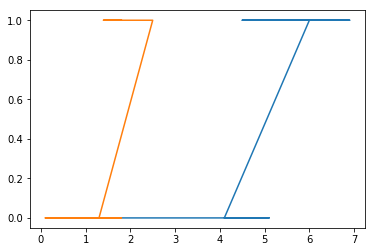

In [25]:
ax1 = plt.subplot2grid((1,1),(0,0))
ax1.plot(X,y)